In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Penginputan Data

In [167]:
df = pd.read_excel('produksi padi.xlsx')
df.head()

,Kabupaten/Kota,Luas_Panen,Produksi_Padi,Produksi_Beras
0,Kabupaten Cilacap,117627,772113,444011
1,Kabupaten Banyumas,52400,284554,163635
2,Kabupaten Purbalingga,28616,165622,95243
3,Kabupaten Banjarnegara,18904,114912,66081
4,Kabupaten Kebumen,73676,425285,244564


Data yang digunakan dalam analisis mencakup variabel-variabel sebagai berikut:
1. Kabupaten/Kota : Nama Kabupaten/Kota yang berada di Jawa Tengah
2. Luas Panen (Hektar) : luasan tanaman yang dipungut hasilnya setelah tanaman tersebut cukup umur, dalam hal ini padi.
3. Produksi Padi (Ton) : merujuk pada jumlah total gabah atau padi yang dihasilkan dari hasil panen tanaman padi dari luas panen.
4. Produksi Beras (Ton) : jumlah total beras yang dihasilkan setelah pengolahan gabah yang telah dipanen.

# Preprocessing

## Pengecekan Tipe Data dan Ukuran Data

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Kabupaten/Kota  35 non-null     object
 1   Luas_Panen      35 non-null     int64 
 2   Produksi_Padi   35 non-null     int64 
 3   Produksi_Beras  35 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


Terdapat 4 variabel (kolom) dengan 35 observasi (baris).
Terdiri atas 1 kolom dengan tipe data object dan 3 kolom lainnya adalah integer.

## Pengecekan missing value dan duplikat

In [168]:
print("Jumlah missing value tiap kolom:")
print(df.isnull().sum())

print("\nJumlah duplikat:")
print(df.duplicated().sum())

Jumlah missing value tiap kolom:
Kabupaten/Kota    0
Luas_Panen        0
Produksi_Padi     0
Produksi_Beras    0
dtype: int64

Jumlah duplikat:
0


Berdasarkan ouput total missing value dan duplikat di atas, didapati bahwa pada seluruh kolom atau seluruh variabel tidak terdapat missing value dan duplikat, sehingga data dapat digunakan untuk tahapan analisis lebih lanjut.

# Exploratory Data Analysis

## Statistika Deskriptif

In [61]:
df.describe()

,Luas_Panen,Produksi_Padi,Produksi_Beras
count,35.000000,35.000000,35.000000
mean,47626.657143,273687.714286,157386.571429
std,36640.811088,222604.092792,128010.567372
min,39.000000,156.000000,90.000000
25%,23426.500000,123413.500000,70970.000000
50%,40732.000000,209088.000000,120238.000000
75%,69076.500000,392747.500000,225853.000000
max,131930.000000,787275.000000,452730.000000


Output tersebut adalah ringkasan statistik dari dataframe yang berisi data produksi padi dan beras di Jawa Tengah. Berikut adalah penjelasan singkat dari setiap bagian output:

1. count: Menunjukkan jumlah entri non-null (tidak missing) dalam setiap kolom. Dalam hal ini, ada 35 entri untuk setiap kolom.
2. mean: Menunjukkan nilai rata-rata dari setiap kolom. Rata-rata luas panen adalah sekitar 47.626 hektar, produksi padi adalah 3. sekitar 273.688 ton, dan produksi beras adalah sekitar 157.387 ton.
4. std: Menunjukkan standar deviasi dari setiap kolom. Standar deviasi luas panen adalah sekitar 36.641 hektar, produksi padi adalah sekitar 222.604 ton, dan produksi beras adalah sekitar 128.011 ton.
5. min: Menunjukkan nilai minimum dari setiap kolom. Nilai minimum luas panen adalah 39 hektar, produksi padi adalah 156 ton, dan produksi beras adalah 90 ton.
6. 25%: Menunjukkan kuartil pertama (25th percentile) dari setiap kolom. Ini adalah nilai di mana 25% dari data berada di bawahnya. Misalnya, 25% dari luas panen kurang dari atau sama dengan 23.426 hektar.
7. 50%: Menunjukkan median atau kuartil kedua (50th percentile) dari setiap kolom. Ini adalah nilai tengah dari data. Misalnya, 50% dari produksi padi kurang dari atau sama dengan 209.088 ton.
8. 75%: Menunjukkan kuartil ketiga (75th percentile) dari setiap kolom. Ini adalah nilai di mana 75% dari data berada di bawahnya. Misalnya, 75% dari produksi beras kurang dari atau sama dengan 225.853 ton.
9. max: Menunjukkan nilai maksimum dari setiap kolom. Nilai maksimum luas panen adalah 131.930 hektar, produksi padi adalah 787.275 ton, dan produksi beras adalah 452.730 ton.

Ringkasan statistik ini memberikan gambaran umum tentang distribusi data produksi padi dan beras di Jawa Tengah, membantu dalam pemahaman tentang variasi dan rentang nilai-nilai tersebut.

## Density Plot

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

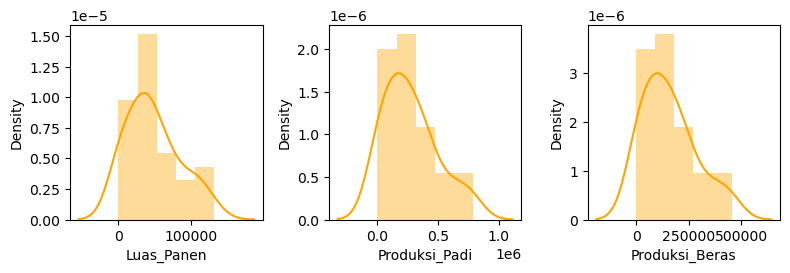

In [62]:
# Kolom numerik yang ingin diplotkan
numeric = ["Luas_Panen", "Produksi_Padi", "Produksi_Beras"]

plt.figure(figsize=(8, 10))
for i in range(0, len(numeric)):
    plt.subplot(4, 3, i+1)
    sns.distplot(df[numeric[i]], color='orange')
    plt.tight_layout()
    
plt.show()

In [63]:
df.sort_values(by='Luas_Panen', ascending=False).head()

,Kabupaten/Kota,Luas_Panen,Produksi_Padi,Produksi_Beras
14,Kabupaten Grobogan,131930,787275,452730
0,Kabupaten Cilacap,117627,772113,444011
13,Kabupaten Sragen,109013,683496,393051
20,Kabupaten Demak,106711,617855,355303
17,Kabupaten Pati,101006,588697,338535


Melihat distribusi dari variabel tersebut dijelaskan sebagai berikut:

1. Luas Panen: Dari distribusi data, kita dapat melihat variasi luas panen antar kabupaten/kota di Jawa Tengah. Mayoritas kabupaten/kota memiliki luas panen di bawah 100.000 hektar, namun terdapat beberapa yang memiliki luas panen yang cukup besar, seperti Kabupaten Grobogan, Kabupaten Cilacap, dan Kabupaten Seragen.

2. Produksi Padi: Distribusi produksi padi juga menunjukkan variasi yang signifikan antar kabupaten/kota. Beberapa kabupaten/kota memiliki produksi padi yang relatif tinggi, seperti Kabupaten Grobogan, Cilacap dan Sragen, sementara yang lain memiliki produksi padi yang lebih rendah.

3. Produksi Beras: Distribusi produksi beras mengikuti pola yang mirip dengan produksi padi, namun ada variasi yang mungkin disebabkan oleh faktor-faktor seperti efisiensi penggilingan gabah menjadi beras. Kabupaten/kota dengan produksi padi yang tinggi biasanya juga memiliki produksi beras yang tinggi, seperti Kabupaten Grobogan, Cilacap, dan Sragen.

Dengan memperhatikan distribusi ini, kita dapat mengevaluasi kinerja produksi padi dan beras di setiap kabupaten/kota, serta mengidentifikasi daerah-daerah yang perlu mendapatkan perhatian lebih lanjut dalam upaya peningkatan produksi padi dan beras.

## Korelasi antar Variabel

In [64]:
korelasi = df.corr()
korelasi

,Luas_Panen,Produksi_Padi,Produksi_Beras
Luas_Panen,1.000000,0.991873,0.991872
Produksi_Padi,0.991873,1.000000,1.000000
Produksi_Beras,0.991872,1.000000,1.000000


Korelasi yang mendekati nilai 1 antara Luas Panen, Produksi Padi, dan Produksi Beras menunjukkan bahwa ketiga variabel tersebut memiliki hubungan yang sangat erat. Dalam konteks ini, ketika luas panen meningkat, cenderung juga akan terjadi peningkatan pada produksi padi dan beras, dan sebaliknya. Ini berarti daerah-daerah yang memiliki luas panen yang besar umumnya juga akan memiliki produksi padi dan beras yang besar.

Dalam analisis klaster untuk mengelompokkan kabupaten/kota berdasarkan produksi padi dan beras, kita dapat menggunakan informasi ini untuk mengidentifikasi daerah-daerah dengan karakteristik produksi yang serupa. Misalnya, daerah-daerah dengan luas panen yang tinggi dapat dikelompokkan bersama-sama karena kemungkinan besar mereka juga memiliki produksi padi dan beras yang tinggi.

Meskipun demikian, perlu diingat bahwa korelasi hanya mengukur hubungan linier antara variabel dan tidak memperhitungkan faktor-faktor lain yang juga dapat memengaruhi produksi padi dan beras, seperti teknologi pertanian, iklim, atau kebijakan pemerintah. Oleh karena itu, interpretasi korelasi perlu dipertimbangkan dalam konteks yang lebih luas.

## Bar Plot Produksi Beras untuk 10 Kabupaten/Kota

In [65]:
#membuat data frame antara variabel kabupaten/kota dengan Produksi Beras, untuk diambil 10 nilai Produksi Beras tertinggi
produksi_beras=pd.DataFrame(df[['Kabupaten/Kota', 'Produksi_Beras']])
produksi_beras["Produksi_Beras"]=round(produksi_beras["Produksi_Beras"],4)
produksi_beras=produksi_beras.sort_values(by="Produksi_Beras", ascending=False).head(10)
produksi_beras.head(10)

,Kabupaten/Kota,Produksi_Beras
14,Kabupaten Grobogan,452730
0,Kabupaten Cilacap,444011
13,Kabupaten Sragen,393051
20,Kabupaten Demak,355303
17,Kabupaten Pati,338535
15,Kabupaten Blora,278910
28,Kabupaten Brebes,259158
4,Kabupaten Kebumen,244564
26,Kabupaten Pemalang,233152
11,Kabupaten Wonogiri,218554


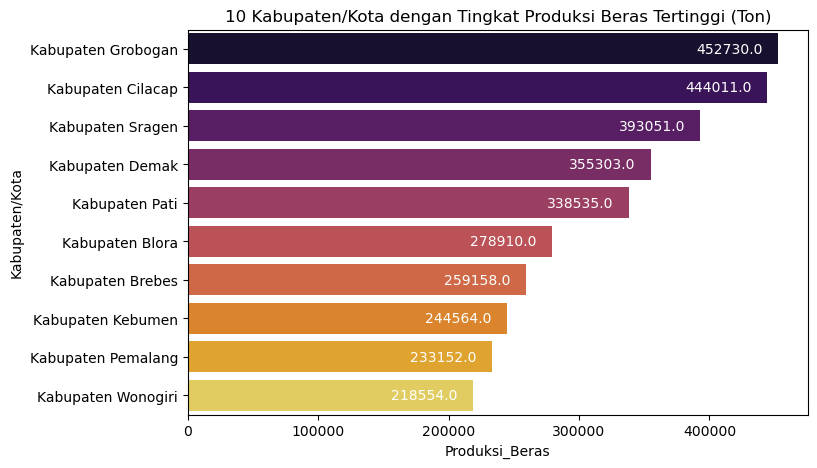

In [66]:
fig,ax=plt.subplots(figsize=(8,5))
ax=sns.barplot(palette="inferno",ax=ax, x="Produksi_Beras", y="Kabupaten/Kota", data=produksi_beras)
plt.title('10 Kabupaten/Kota dengan Tingkat Produksi Beras Tertinggi (Ton)', fontsize=12)

rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -59
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'white')            # Change label color to white

# Clustering

Digunakan metode K-Means, untuk mengelompokan Kabupaten/Kota di Jawa Tengah berdasarkan Produksi Padi dan Beras tahun 2022

### K-Means Clustering
Teknik unsupervised learning digunakan untuk melakukan proses pembelajaran pada data yang tidak memiliki informasi label dari objek yang akan diteliti. K-Means clustering adalah metode yang digunakan untuk melakukan pengelompokkan objek ke dalam sejumlah k klaster. Sebelum mengelompokkan observasi ke dalam klaster-klaster, terlebih dahulu ditentukan parameter berupa jumlah klaster (k) (Pramana, S., Yuniarto, B., Mariyah, S., Santoso, I., & Nooraeni, R 2020).

## Penentuan K Optimal

### Metode silhouette score

In [67]:
# Memilih kolom yang akan digunakan untuk analisis klaster
klast_data = df[['Luas_Panen', 'Produksi_Padi', 'Produksi_Beras']]

In [69]:
# Import library silhouette
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
best_silhouette_score = -1
best_k = -1

for num_clusters in range_n_clusters:
    # Inisisasi K-Means
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
    kmeans.fit(klast_data)
    cluster_labels = kmeans.labels_

    # Silhouette Score
    silhouette_avg = silhouette_score(klast_data, cluster_labels)
    print("Untuk n_clusters={0}, nilai koefisien silhouette adalah {1}".format(num_clusters, silhouette_avg))
    
    # Memperbarui nilai silhouette terbaik dan jumlah kluster
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_k = num_clusters

# Menampilkan kluster terbaik
print("Best K:", best_k)

Untuk n_clusters=2, nilai koefisien silhouette adalah 0.579985942124742
Untuk n_clusters=3, nilai koefisien silhouette adalah 0.6170620840981471
Untuk n_clusters=4, nilai koefisien silhouette adalah 0.6476333184507148
Untuk n_clusters=5, nilai koefisien silhouette adalah 0.5775513631131567
Untuk n_clusters=6, nilai koefisien silhouette adalah 0.6557473668261568
Untuk n_clusters=7, nilai koefisien silhouette adalah 0.6411009991145297
Untuk n_clusters=8, nilai koefisien silhouette adalah 0.6118297550161285
Best K: 6


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

Berdasarkan nilai koefisien silhouette yang diperoleh, kita dapat melihat bahwa jumlah klaster terbaik (best K) adalah 6, karena memiliki nilai koefisien silhouette tertinggi. Ini menunjukkan bahwa pembagian data ke dalam 6 klaster memberikan pemisahan yang paling baik antara klaster tanpa terlalu banyak tumpang tindih.

### Davies-Bouldin (DBI)

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# List untuk menyimpan nilai DBI untuk setiap jumlah klaster
dbi_scores = []

# Range jumlah klaster yang akan diuji
num_clusters_range = range(2, 8)

# Loop untuk mencoba setiap jumlah klaster
for num_clusters in num_clusters_range:
    # Inisisasi dan melatih model K-Means
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
    kmeans.fit(klast_data)
    cluster_labels = kmeans.labels_
    
    # Menghitung Davies-Bouldin Index
    db_index = davies_bouldin_score(klast_data, cluster_labels)
    dbi_scores.append(db_index)

    # Menampilkan nilai DBI untuk setiap jumlah klaster
    print(f"Davies-Bouldin Index untuk {num_clusters} klaster: {db_index}")

# Menampilkan nilai DBI untuk setiap jumlah klaster
print("Nilai DBI untuk setiap jumlah klaster:", dbi_scores)

# Menampilkan kluster terbaik

Davies-Bouldin Index untuk 2 klaster: 0.5776506048311473
Davies-Bouldin Index untuk 3 klaster: 0.5459166008201386
Davies-Bouldin Index untuk 4 klaster: 0.3866193932090612
Davies-Bouldin Index untuk 5 klaster: 0.3771489074021675
Davies-Bouldin Index untuk 6 klaster: 0.3737994444555559
Davies-Bouldin Index untuk 7 klaster: 0.46465429471084974
Nilai DBI untuk setiap jumlah klaster: [0.5776506048311473, 0.5459166008201386, 0.3866193932090612, 0.3771489074021675, 0.3737994444555559, 0.46465429471084974]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

Berdasarkan nilai Davies-Bouldin Index (DBI) yang dihasilkan untuk berbagai banyak klaster, diambil kesimpulan bahwa klaster yang optimal adalah dengan jumlah 6 klaster. Ini karena DBI memiliki nilai terendah untuk 6 klaster, yaitu sebesar 0.3737994444555559, dibandingkan dengan jumlah klaster lainnya.

## Pembentukan 6 Klaster

In [70]:
kmeans = KMeans(n_clusters = 6, random_state=42)

# Fit the K-Means model to the data
kmeans.fit(klast_data)

# Obtain the cluster labels for each data point
labels = kmeans.labels_

centroids = kmeans.cluster_centers_

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [71]:
klast_data["Klaster"] = labels
klast_data

,Luas_Panen,Produksi_Padi,Produksi_Beras,Klaster
0,117627,772113,444011,0
1,52400,284554,163635,5
2,28616,165622,95243,1
3,18904,114912,66081,1
4,73676,425285,244564,2
5,49845,283105,162802,5
6,13728,70459,40518,3
7,34634,175080,100681,1
8,47760,302311,173847,5
9,63671,367724,211463,4


In [76]:
df = pd.read_csv('hasil kluster.csv')

In [77]:
df

,Kabupaten/Kota,Luas_Panen,Produksi_Padi,Produksi_Beras,Kluster
0,Kabupaten Cilacap,117627,772113,444011,1
1,Kabupaten Banyumas,52400,284554,163635,4
2,Kabupaten Purbalingga,28616,165622,95243,5
3,Kabupaten Banjarnegara,18904,114912,66081,5
4,Kabupaten Kebumen,73676,425285,244564,3
5,Kabupaten Purworejo,49845,283105,162802,4
6,Kabupaten Wonosobo,13728,70459,40518,6
7,Kabupaten Magelang,34634,175080,100681,5
8,Kabupaten Boyolali,47760,302311,173847,4
9,Kabupaten Klaten,63671,367724,211463,3


In [79]:
df.groupby('Kluster').agg(['mean','median'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10384\579898693.py:1: FutureWarning: ['Kabupaten/Kota'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('Kluster').agg(['mean','median'])


Luas_Panen            Produksi_Padi           Produksi_Beras  \
                  mean    median           mean    median           mean   
Kluster                                                                    
1        124778.500000  124778.5  779694.000000  779694.0  448370.500000   
2        105576.666667  106711.0  630016.000000  617855.0  362296.333333   
3         74380.166667   73371.5  419029.833333  415362.5  240966.833333   
4         50555.500000   48802.5  299461.000000  293432.5  172207.833333   
5         31775.000000   31644.5  165832.600000  168421.0   95363.400000   
6          4160.250000    1134.0   20045.375000    5649.0   11527.250000   

                   
           median  
Kluster            
1        448370.5  
2        355303.0  
3        238858.0  
4        168741.0  
5         96852.0  
6          3248.5

In [81]:
df.groupby('Kluster').agg(['mean'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10384\3039962074.py:1: FutureWarning: ['Kabupaten/Kota'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('Kluster').agg(['mean'])


,Luas_Panen,Produksi_Padi,Produksi_Beras
,mean,mean,mean
Kluster,,,
1,124778.500000,779694.000000,448370.500000
2,105576.666667,630016.000000,362296.333333
3,74380.166667,419029.833333,240966.833333
4,50555.500000,299461.000000,172207.833333
5,31775.000000,165832.600000,95363.400000
6,4160.250000,20045.375000,11527.250000


In [91]:
klast_data['Klaster'] = klast_data['Klaster'].replace({0: 5, 1: 1, 2: 3, 3: 6, 4: 4, 5: 2})
labels = klast_data["Klaster"]

In [92]:
klast_data.groupby('Klaster').agg(['mean','median'])

Luas_Panen            Produksi_Padi           Produksi_Beras  \
                  mean    median           mean    median           mean   
Klaster                                                                    
1        124778.500000  124778.5  779694.000000  779694.0  448370.500000   
2        105576.666667  106711.0  630016.000000  617855.0  362296.333333   
3         74380.166667   73371.5  419029.833333  415362.5  240966.833333   
4         50555.500000   48802.5  299461.000000  293432.5  172207.833333   
5         31775.000000   31644.5  165832.600000  168421.0   95363.400000   
6          4160.250000    1134.0   20045.375000    5649.0   11527.250000   

                   
           median  
Klaster            
1        448370.5  
2        355303.0  
3        238858.0  
4        168741.0  
5         96852.0  
6          3248.5

In [172]:
df['Klaster'] = labels

ValueError: Length of values (2) does not match length of index (35)

In [98]:
df

,Kabupaten/Kota,Luas_Panen,Produksi_Padi,Produksi_Beras,Kluster
0,Kabupaten Cilacap,117627,772113,444011,1
1,Kabupaten Banyumas,52400,284554,163635,4
2,Kabupaten Purbalingga,28616,165622,95243,5
3,Kabupaten Banjarnegara,18904,114912,66081,5
4,Kabupaten Kebumen,73676,425285,244564,3
5,Kabupaten Purworejo,49845,283105,162802,4
6,Kabupaten Wonosobo,13728,70459,40518,6
7,Kabupaten Magelang,34634,175080,100681,5
8,Kabupaten Boyolali,47760,302311,173847,4
9,Kabupaten Klaten,63671,367724,211463,3


In [110]:
# Menghitung rata-rata atau median dari setiap variabel di setiap klaster
cluster_characteristics = df.groupby('Kluster').agg({'Luas_Panen': 'mean', 'Produksi_Padi': 'mean', 'Produksi_Beras': 'mean'})

# Menambahkan kolom dengan nama klaster
cluster_characteristics['Nama_Kluster'] = ['Produksi Sangat Tinggi', 'Produksi Tinggi', 'Produksi Sedang', 'Produksi Rendah', 'Produksi Sangat Rendah', 'Produksi Sangat-Sangat Rendah']

# Menampilkan hasil
cluster_characteristics

,Luas_Panen,Produksi_Padi,Produksi_Beras,Nama_Kluster
Kluster,,,,
1,124778.500000,779694.000000,448370.500000,Produksi Sangat Tinggi
2,105576.666667,630016.000000,362296.333333,Produksi Tinggi
3,74380.166667,419029.833333,240966.833333,Produksi Sedang
4,50555.500000,299461.000000,172207.833333,Produksi Rendah
5,31775.000000,165832.600000,95363.400000,Produksi Sangat Rendah
6,4160.250000,20045.375000,11527.250000,Produksi Sangat-Sangat Rendah


In [173]:
df.head()

,Kabupaten/Kota,Luas_Panen,Produksi_Padi,Produksi_Beras
0,Kabupaten Cilacap,117627,772113,444011
1,Kabupaten Banyumas,52400,284554,163635
2,Kabupaten Purbalingga,28616,165622,95243
3,Kabupaten Banjarnegara,18904,114912,66081
4,Kabupaten Kebumen,73676,425285,244564


In [82]:
import pandas as pd

# Atur lebar maksimum kolom
pd.set_option('display.max_colwidth', None)

# Membuat DataFrame dengan kolom Kluster dan Kabupaten/Kota
cluster_city_df = df.groupby('Kluster')['Kabupaten/Kota'].apply(', '.join).reset_index()

# Mengatur kolom 'Kluster' sebagai indeks dan menghapus indeks sebelumnya
cluster_city_df.set_index('Kluster', inplace=True, drop=True)

# Menampilkan DataFrame
cluster_city_df

,Kabupaten/Kota
Kluster,
1,"Kabupaten Cilacap, Kabupaten Grobogan"
2,"Kabupaten Sragen, Kabupaten Pati, Kabupaten Demak"
3,"Kabupaten Kebumen, Kabupaten Klaten, Kabupaten Wonogiri, Kabupaten Blora, Kabupaten Pemalang, Kabupaten Brebes"
4,"Kabupaten Banyumas, Kabupaten Purworejo, Kabupaten Boyolali, Kabupaten Sukoharjo, Kabupaten Karanganyar, Kabupaten Tegal"
5,"Kabupaten Purbalingga, Kabupaten Banjarnegara, Kabupaten Magelang, Kabupaten Rembang, Kabupaten Kudus, Kabupaten Jepara, Kabupaten Semarang, Kabupaten Kendal, Kabupaten Batang, Kabupaten Pekalongan"
6,"Kabupaten Wonosobo, Kabupaten Temanggung, Kota Magelang, Kota Surakarta, Kota Salatiga, Kota Semarang, Kota Pekalongan, Kota Tegal"


In [166]:
df['Kluster'].value_counts()

5    10
6     8
4     6
3     6
2     3
1     2
Name: Kluster, dtype: int64

In [86]:
klas_data = df

## Sebaran Kluster

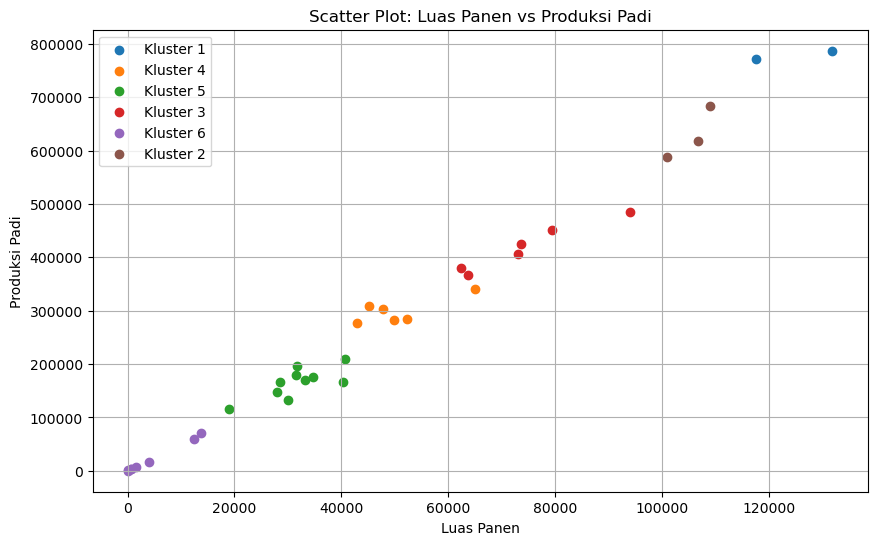

In [92]:
# Membuat scatter plot
plt.figure(figsize=(10, 6))
for kluster in df['Kluster'].unique():
    data_kluster = df[df['Kluster'] == kluster]
    plt.scatter(data_kluster['Luas_Panen'], data_kluster['Produksi_Padi'], label=f'Kluster {kluster}')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Luas Panen')
plt.ylabel('Produksi Padi')

# Menambahkan judul
plt.title('Scatter Plot: Luas Panen vs Produksi Padi')

# Menampilkan legend
plt.legend()

# Menampilkan plot
plt.grid(True)
plt.show()

In [169]:
data_8_teratas = df.sort_values('Produksi_Beras', ascending=False).head(10)
data_27_terbawah = df.sort_values('Produksi_Beras', ascending=False).tail(25)

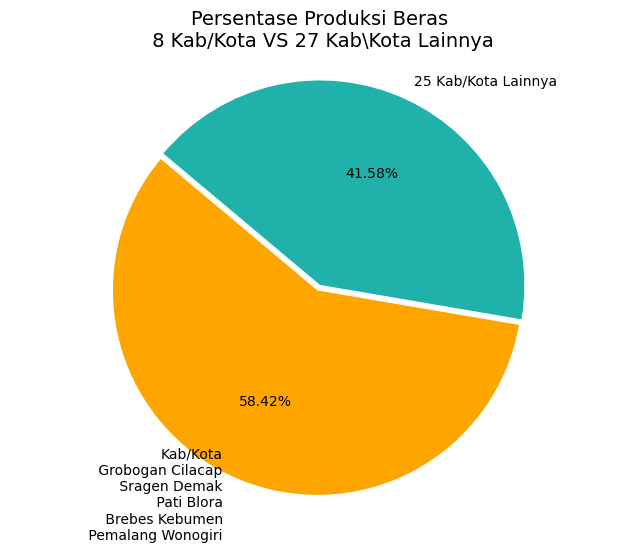

In [171]:
data_8 = data_8_teratas['Produksi_Beras'].sum() / sum(df['Produksi_Beras'])
data_27 = data_27_terbawah['Produksi_Beras'].sum() / sum(df['Produksi_Beras'])

# Membuat label untuk pie chart
labels = ['Kab/Kota\n Grobogan Cilacap\n Sragen Demak\n Pati Blora\n Brebes Kebumen\n Pemalang Wonogiri', '25 Kab/Kota Lainnya']

# Membuat data untuk pie chart
sizes = [data_8, data_27]

# Membuat pie chart
plt.figure(figsize=(8, 6))

colors = ['#FFA500', '#20B2AA']  # warna untuk setiap bagian
explode = (0.03, 0)  # menambahkan celah di tengah lingkaran
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=colors, explode=explode)

# Menambahkan judul
plt.title('Persentase Produksi Beras\n 8 Kab/Kota VS 27 Kab\Kota Lainnya', fontsize=14)

# Menampilkan pie chart
plt.axis('equal')
plt.show()

In [120]:
data_8 = data_8_teratas['Produksi_Beras'].sum()/sum(df['Produksi_Beras'])

0.5021778950101025

In [122]:
data_27 = data_27_terbawah['Produksi_Beras'].sum()/sum(df['Produksi_Beras'])

1.0